In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py 
from plotly.offline import iplot
import plotly.tools as tls 
import cufflinks as cf 
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Jalpa-08/Machine-Learning-Models/main/DATA/Telco-Customer-Churn.csv")

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7032, 22)

In [5]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)


In [9]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [10]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [15]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [16]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [19]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [20]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Churn', ylabel='count'>

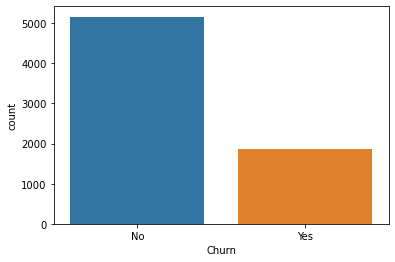

In [22]:
sns.countplot('Churn',data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

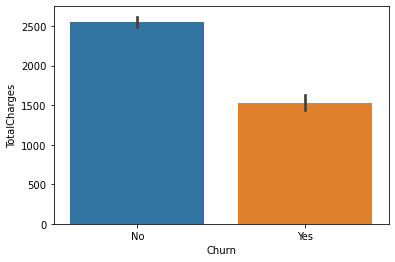

In [23]:
sns.barplot(data=df ,x='Churn', y='TotalCharges')

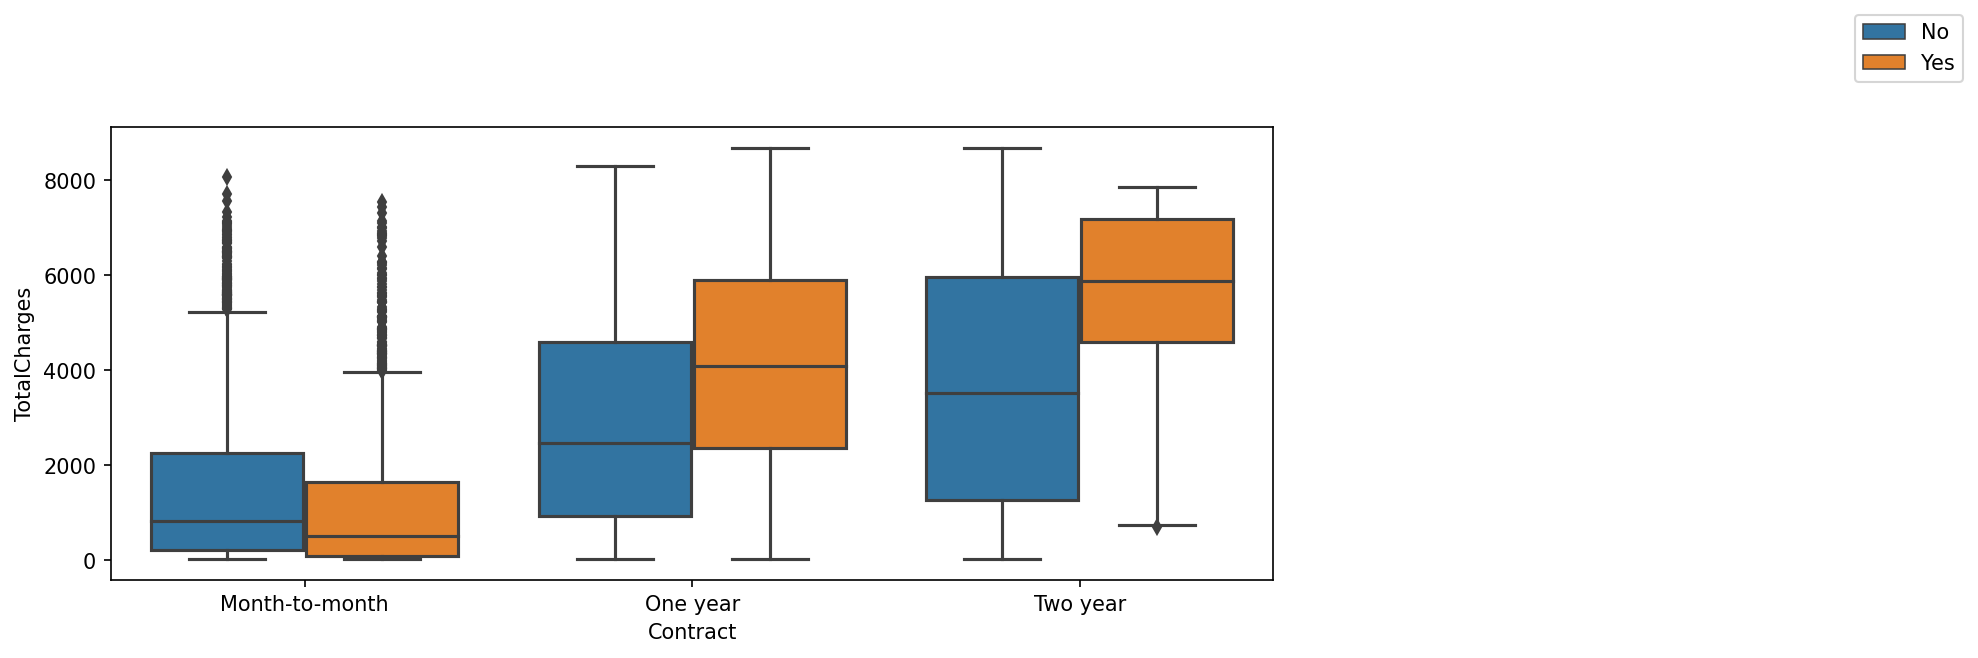

In [24]:
plt.figure(dpi=150, figsize=(10,4))
sns.boxplot(data=df ,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.5,1.1))

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
df.drop(['customerID'],axis=1,inplace=True)


In [27]:
df['gender']=df['gender'].map({'Female':0,'Male':1})

In [49]:
df['Churn']=df['Churn'].map({'Yes':0,'No':1})

In [28]:
df['Partner']=df['Partner'].map({'Yes':0,'No':1})

In [29]:
df['PhoneService']=df['PhoneService'].map({'Yes':0,'No':1})

In [30]:
df['OnlineSecurity']=df['OnlineSecurity'].map({'Yes':0,'No':1})

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,No,1,1,No phone service,DSL,1.0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,No,34,0,No,DSL,0.0,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,1,No,2,0,No,DSL,0.0,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,1,No,45,1,No phone service,DSL,0.0,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,1,No,2,0,No,Fiber optic,1.0,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df['Dependents']=df['Dependents'].map({'Yes':0,'No':1})

In [33]:
df['OnlineBackup']=df['OnlineBackup'].map({'Yes':0,'No':1})

In [34]:
df['InternetService']=df['InternetService'].map({'DSL':0,'Fiber optic':1, 'No':2})

In [35]:
df['MultipleLines']=df['MultipleLines'].map({'Yes':0,'No phonne service':1, 'No':2})

In [36]:
df['DeviceProtection']=df['DeviceProtection'].map({'Yes':0,'No':1})

In [37]:
df['TechSupport']=df['TechSupport'].map({'Yes':0,'No':1})

In [38]:
df['StreamingTV']=df['StreamingTV'].map({'Yes':0,'No':1})

In [39]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,0.001379,-0.010349,0.005285,0.007515,0.007432,-0.002236,0.017665,0.013786,-0.001218,0.008291,0.006400,-0.013779,0.000048
SeniorCitizen,-0.001819,1.000000,-0.016957,0.210550,0.015683,-0.008392,-0.153747,-0.032160,0.110155,0.003253,0.011162,0.135289,-0.034150,0.219874,0.102411
Partner,0.001379,-0.016957,1.000000,0.452269,-0.381912,0.018397,0.150561,-0.000513,0.171581,0.173154,0.187386,0.144021,0.154387,-0.097825,-0.319072
Dependents,-0.010349,0.210550,0.452269,1.000000,-0.163386,-0.001078,-0.026310,-0.044030,0.157478,0.096695,0.084184,0.136108,0.052660,0.112343,-0.064653
tenure,0.005285,0.015683,-0.381912,-0.163386,1.000000,-0.007877,-0.361306,-0.029835,-0.377664,-0.423038,-0.423383,-0.374344,-0.328069,0.246862,0.825880
PhoneService,0.007515,-0.008392,0.018397,-0.001078,-0.007877,1.000000,NaN,-0.387266,-0.037132,0.014632,-0.005223,-0.040368,0.055687,-0.248033,-0.113008
MultipleLines,0.007432,-0.153747,0.150561,-0.026310,-0.361306,NaN,1.000000,0.109472,0.053949,0.162362,0.170136,0.056993,0.216328,-0.456642,-0.466612
InternetService,-0.002236,-0.032160,-0.000513,-0.044030,-0.029835,-0.387266,0.109472,1.000000,0.222298,0.014056,0.000848,0.211913,-0.169519,-0.322173,-0.175691
OnlineSecurity,0.017665,0.110155,0.171581,0.157478,-0.377664,-0.037132,0.053949,0.222298,1.000000,0.179488,0.170099,0.273270,0.043613,-0.069771,-0.331783
OnlineBackup,0.013786,0.003253,0.173154,0.096695,-0.423038,0.014632,0.162362,0.014056,0.179488,1.000000,0.185021,0.190381,0.146821,-0.252683,-0.431750


In [ ]:
df.info()

<AxesSubplot:>

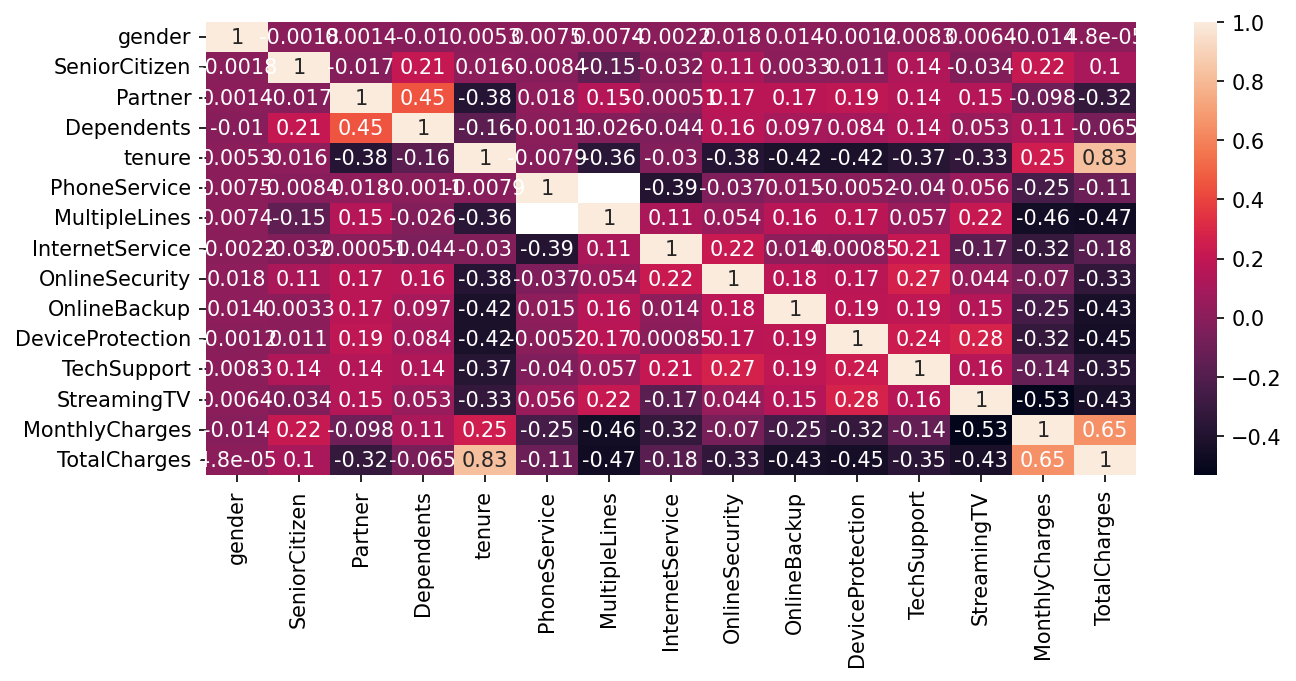

In [41]:
plt.figure(dpi=150, figsize=(10,4))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

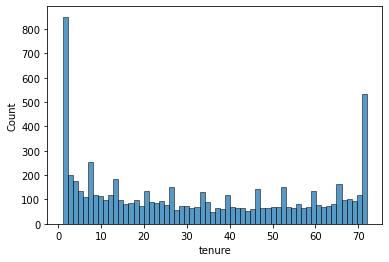

In [45]:
sns.histplot(data=df ,x='tenure',bins=60)

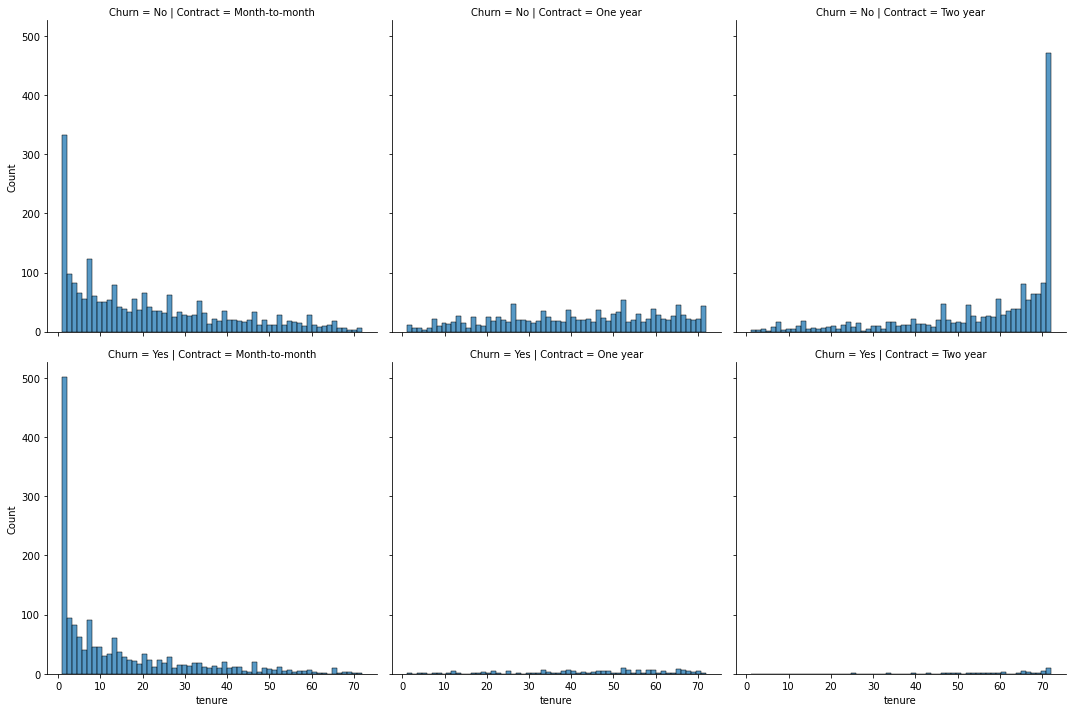

In [46]:
sns.displot(data=df,x='tenure',bins=60,col='Contract',row='Churn');

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

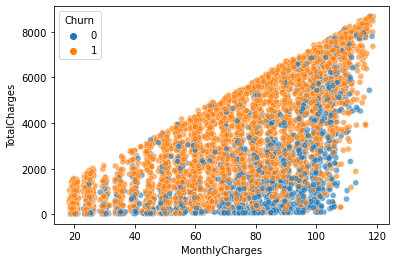

In [50]:
sns.scatterplot(data=df , x='MonthlyCharges', y='TotalCharges',hue='Churn',alpha=0.6)

In [52]:
Churn=df.groupby(['Churn','tenure']).count().transpose()[0,1]

In [54]:
Churn

gender              380
SeniorCitizen       380
Partner             380
Dependents          380
PhoneService        380
MultipleLines       341
InternetService     380
OnlineSecurity      322
OnlineBackup        322
DeviceProtection    322
TechSupport         322
StreamingTV         322
StreamingMovies     380
Contract            380
PaperlessBilling    380
PaymentMethod       380
MonthlyCharges      380
TotalCharges        380
Name: (0, 1), dtype: int64

In [1]:
def cohert(tenure):
    if tenure<13:
        return '0-12 months'
    elif tenure<25:
        return '12-24 months'
    elif tenure<49:
        return '24-48 months'
    else:
        return 'over 48 months'